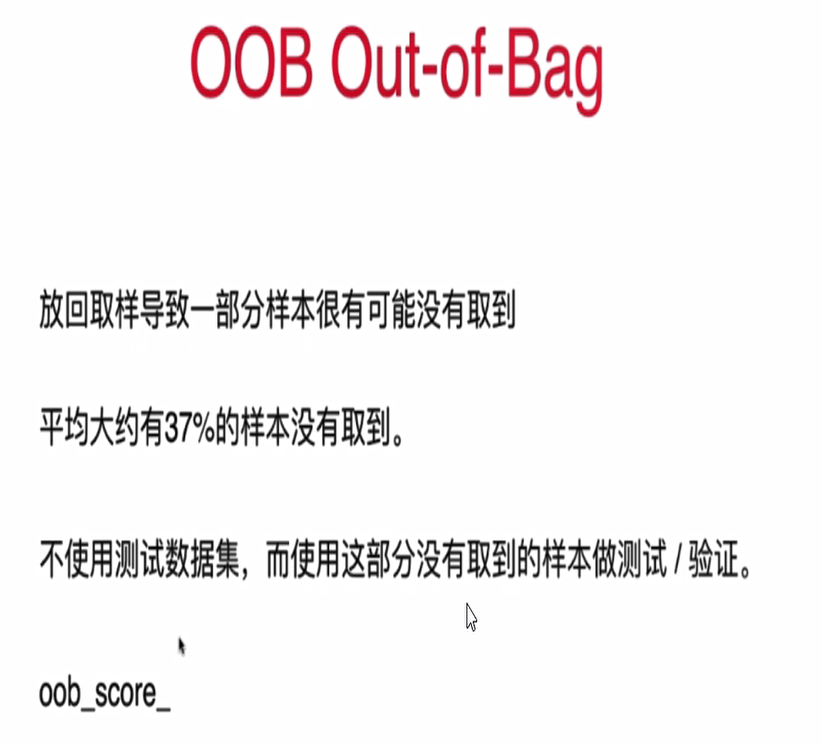

## oob和更多Bagging相关

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y=datasets.make_moons(n_samples=500,noise=0.3,random_state=42)

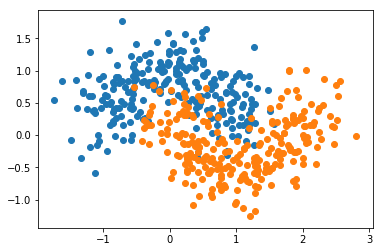

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用oob

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=500, max_samples=100,
                             bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [6]:
bagging_clf.oob_score_

0.918

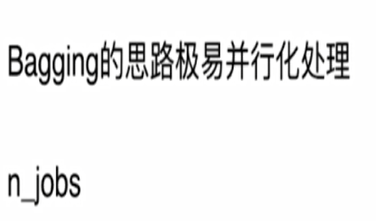

## n_jobs

In [8]:
%%time
bagging_clf=BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=5000,max_samples=100,
                             bootstrap=True,oob_score=True)
bagging_clf.fit(X,y)

Wall time: 5.9 s


In [10]:
%%time
bagging_clf=BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=5000,max_samples=100,
                             bootstrap=True,oob_score=True,
                             n_jobs=-1)
bagging_clf.fit(X,y)

Wall time: 6.97 s


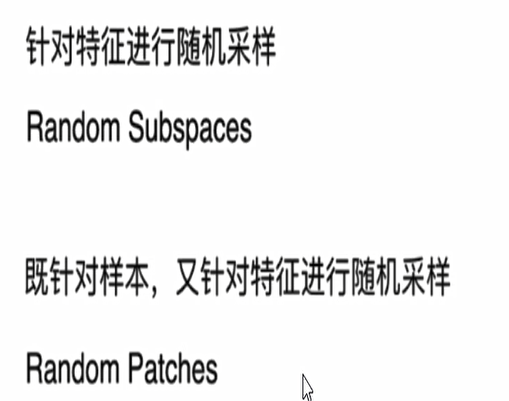

## boostrap_features

In [11]:
random_subspaces_clf=BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=500,max_samples=500,
                             bootstrap=True,oob_score=True,
                             n_jobs=-1,
                             max_features=1,bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.824

In [13]:
random_patches_clf=BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=500,max_samples=100,
                             bootstrap=True,oob_score=True,
                             n_jobs=-1,
                             max_features=1,bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.854